## Setup:

In [24]:
# Setting up the environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Acknowledgements:

* According to the lastest *Dietary Guidlines* for Americans 2020-2025, calorie needs vary based on many factors. See the full report [here](https://www.dietaryguidelines.gov/sites/default/files/2020-12/Dietary_Guidelines_for_Americans_2020-2025.pdf).

* For the simplicity of this analysis, recommendations on how to achieve a healthy diet is based on an average of 2,000 calories needs, consists of *2.5 cups vegetables and 2 cup fruits*.

* For many fruits and vegetables, a 1-cup equivalent equals the weight of enough edible portion (e.g., minus pits or peels) to fill a measuring cup. But not always. Some foods are more concentrated, and some are more airy or contain more water. A cup equivalent for lettuce and other raw leafy vegetables is 2 cups; for raisins and other dried fruits, it is one-half cup.

* Questions to be answered by examining the quantity and variety of fruits and vegetables that a household can afford with a limited budget: Are 2023 food prices a barrier to eating a healthy diet?

## Installation:

In [5]:
# Read fruits and vegetables spreadsheets
df_fruits = pd.read_csv("/Users/chichi/Desktop/WIP/fruit_and_veg_prices/fruit-2020/Fruit Prices 2020.csv")
df_vegetables = pd.read_csv("/Users/chichi/Desktop/WIP/fruit_and_veg_prices/vegetables-2020/Vegetable Prices 2020.csv")

### Exploring the data

In [12]:
# Fruit data
df_fruits = df_fruits.round(2)
df_fruits.head(5)
df_fruits.info()
df_fruits.describe().round(2)
df_fruits[df_fruits.duplicated()]

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.52,per pound,0.90,0.24,pounds,0.41
1,"Apples, applesauce",Canned,1.07,per pound,1.00,0.54,pounds,0.58
2,"Apples, ready-to-drink",Juice,0.78,per pint,1.00,8.00,fluid ounces,0.39
3,"Apples, frozen concentrate",Juice,0.59,per pint,1.00,8.00,fluid ounces,0.29
4,Apricots,Fresh,2.97,per pound,0.93,0.36,pounds,1.16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fruit               62 non-null     object 
 1   Form                62 non-null     object 
 2   RetailPrice         62 non-null     float64
 3   RetailPriceUnit     62 non-null     object 
 4   Yield               62 non-null     float64
 5   CupEquivalentSize   62 non-null     float64
 6   CupEquivalentUnit   62 non-null     object 
 7   CupEquivalentPrice  62 non-null     float64
dtypes: float64(4), object(4)
memory usage: 4.0+ KB


,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
count,62.00,62.00,62.00,62.00
mean,2.62,0.88,1.70,0.92
std,2.07,0.17,2.95,0.49
min,0.36,0.46,0.12,0.23
25%,1.15,0.72,0.32,0.58
50%,1.87,0.98,0.36,0.90
75%,3.53,1.00,0.54,1.15
max,10.55,1.00,8.00,3.07


,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice


There's no missing or invalid values. Data contains 62 types of fruits, recorded with cup equivalent size and price.
Fruits cost ranged from 23 cents to $3.07 per cup equivalent.

In [13]:
# Vegetables data
df_vegetables = df_vegetables.round(2)
df_vegetables.head(5)
df_vegetables.info()
df_vegetables.describe().round(2)
df_vegetables[df_vegetables.duplicated()]

,Vegetable,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Acorn squash,Fresh,1.18,per pound,0.46,0.45,pounds,1.16
1,Artichoke,Fresh,2.19,per pound,0.38,0.39,pounds,2.25
2,Artichoke,Canned,3.41,per pound,0.65,0.39,pounds,2.03
3,Asparagus,Fresh,2.76,per pound,0.49,0.40,pounds,2.22
4,Asparagus,Canned,3.13,per pound,0.65,0.40,pounds,1.91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vegetable           93 non-null     object 
 1   Form                93 non-null     object 
 2   RetailPrice         93 non-null     float64
 3   RetailPriceUnit     93 non-null     object 
 4   Yield               93 non-null     float64
 5   CupEquivalentSize   93 non-null     float64
 6   CupEquivalentUnit   93 non-null     object 
 7   CupEquivalentPrice  93 non-null     float64
dtypes: float64(4), object(4)
memory usage: 5.9+ KB


,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
count,93.00,93.00,93.00,93.00
mean,1.89,0.96,0.34,0.74
std,1.01,0.50,0.07,0.47
min,0.67,0.38,0.15,0.20
25%,1.16,0.65,0.30,0.48
50%,1.68,0.88,0.34,0.62
75%,2.19,0.97,0.39,0.85
max,6.70,2.54,0.54,2.57


,Vegetable,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice


There's no missing or invalid values. Data contains 93 types of vegetables, recorded with cup equivalent size and price.
Vegetables cost ranged from 20 cents to $2.58 per cup equivalent.

### Fruit costs per cup equivalent

In [118]:
# Group fruits based on price, with increaments of 40 cents
group_fruits = df_fruits.groupby(pd.cut(df_fruits["CupEquivalentPrice"], [0.20, 0.39, 0.79, 1.19, 1.59, 3.08]))["Fruit"].count()
# Create pandas data frame and reset index
group_fruits = pd.DataFrame(group_fruits)
group_fruits = group_fruits.reset_index(level=['CupEquivalentPrice'])
group_fruits

/var/folders/z5/k3skf7xd47v_kpnz3xlnx3940000gn/T/ipykernel_2837/3507558406.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_fruits = df_fruits.groupby(pd.cut(df_fruits["CupEquivalentPrice"], [0.20, 0.39, 0.79, 1.19, 1.59, 3.08]))["Fruit"].count()


,CupEquivalentPrice,Fruit
0,"(0.2, 0.39]",7
1,"(0.39, 0.79]",21
2,"(0.79, 1.19]",21
3,"(1.19, 1.59]",10
4,"(1.59, 3.08]",3


Seven out of 62 fresh and processed fruits cost less than 40 cents per cup equivalent in 2023, and another 21 fruits cost less than 80 cents per cup equivalent.

Text(0.5, 0, 'Retail cost per cup equivalent (2023 dollars)')

Text(0, 0.5, 'No. of fruits')

[Text(0, 0, '$0.20-0.39'),
 Text(1, 0, '$0.40-0.79'),
 Text(2, 0, '$0.80-1.19'),
 Text(3, 0, '$1.20-1.59'),
 Text(4, 0, '$1.60-3.08')]

[Text(0, 0, '7'),
 Text(0, 0, '21'),
 Text(0, 0, '21'),
 Text(0, 0, '10'),
 Text(0, 0, '3')]

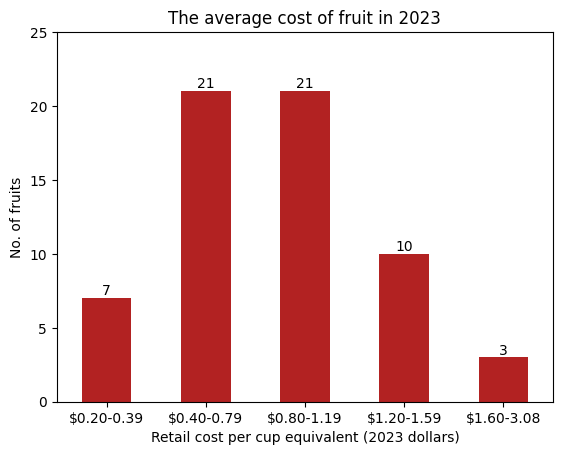

In [117]:
# Visualization

ax = group_fruits.plot.bar(color="firebrick",legend=False,title="The average cost of fruit in 2023",grid=False)

# Customize the plot
ax.set_xlabel("Retail cost per cup equivalent (2023 dollars)")
ax.set_ylabel("No. of fruits")
ax.set_xticklabels(['$0.20-0.39','$0.40-0.79','$0.80-1.19','$1.20-1.59','$1.60-3.08'],rotation=0)
ax.set_yticks([0,5,10,15,20,25])
ax.bar_label(ax.containers[0])

#### Takeaway
According to the guidelines, 2-cup-fruit daily recommendation can be achived at as little cost as $0.40-0.80 with 7 options or $0.80-1.60 with an extra 21 options to choose from.

#### Get to know the right types of fruits

In [120]:
# Find the most expensive fruits
df_fruits.sort_values(by=['CupEquivalentPrice'], ascending=False).head(3)

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
16,"Cherries, packed in syrup or water",Canned,4.53,per pound,0.65,0.44,pounds,3.07
57,Raspberries,Fresh,6.64,per pound,0.96,0.32,pounds,2.21
10,Blackberries,Fresh,6.02,per pound,0.96,0.32,pounds,2.00


Cherries, raspberries and blackberries are at higher price points, ranging from $2.00-3.07 per cup equivalent.

In [121]:
# Find the least expensive fruits
df_fruits.sort_values(by=['CupEquivalentPrice'], ascending=False).tail(7)

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
2,"Apples, ready-to-drink",Juice,0.78,per pint,1.00,8.00,fluid ounces,0.39
36,"Oranges, frozen concentrate",Juice,0.77,per pint,1.00,8.00,fluid ounces,0.38
28,"Grapes, frozen concentrate",Juice,0.71,per pint,1.00,8.00,fluid ounces,0.36
51,"Pineapple, frozen concentrate",Juice,0.70,per pint,1.00,8.00,fluid ounces,0.35
3,"Apples, frozen concentrate",Juice,0.59,per pint,1.00,8.00,fluid ounces,0.29
8,Bananas,Fresh,0.52,per pound,0.64,0.33,pounds,0.27
61,Watermelon,Fresh,0.36,per pound,0.52,0.33,pounds,0.23


Fresh bananas and watermelon are the healthiest and most affordable fruits, at 23 to 27 cents per cup equivalent. There are cheaper options, like apples or orange juice. However, they are processed, lacked of dietary fiber, packed with sugar and are less encouraged.

### Vegetable costs per cup equivalent

In [125]:
# Group vegetables based on price, with increaments of 40 cents
group_vegetables = df_vegetables.groupby(pd.cut(df_vegetables["CupEquivalentPrice"], [0.19, 0.39, 0.79, 1.19, 1.59, 2.58]))["Vegetable"].count()
# Create pandas data frame and reset index
group_vegetables = pd.DataFrame(group_vegetables)
group_vegetables = group_vegetables.reset_index(level=['CupEquivalentPrice'])
group_vegetables

/var/folders/z5/k3skf7xd47v_kpnz3xlnx3940000gn/T/ipykernel_2837/181655245.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_vegetables = df_vegetables.groupby(pd.cut(df_vegetables["CupEquivalentPrice"], [0.19, 0.39, 0.79, 1.19, 1.59, 2.58]))["Vegetable"].count()


,CupEquivalentPrice,Vegetable
0,"(0.19, 0.39]",17
1,"(0.39, 0.79]",48
2,"(0.79, 1.19]",18
3,"(1.19, 1.59]",2
4,"(1.59, 2.58]",8


17 out of 93 vegetables cost less than 40 cents per cup equivalent in 2023, and another 48 fruits cost less than 80 cents per cup equivalent.

Text(0.5, 0, 'Retail cost per cup equivalent (2023 dollars)')

Text(0, 0.5, 'No. of vegetables')

[Text(0, 0, '$0.19-0.39'),
 Text(1, 0, '$0.40-0.79'),
 Text(2, 0, '$0.80-1.19'),
 Text(3, 0, '$1.20-1.59'),
 Text(4, 0, '$1.60-2.58')]

[Text(0, 0, '17'),
 Text(0, 0, '48'),
 Text(0, 0, '18'),
 Text(0, 0, '2'),
 Text(0, 0, '8')]

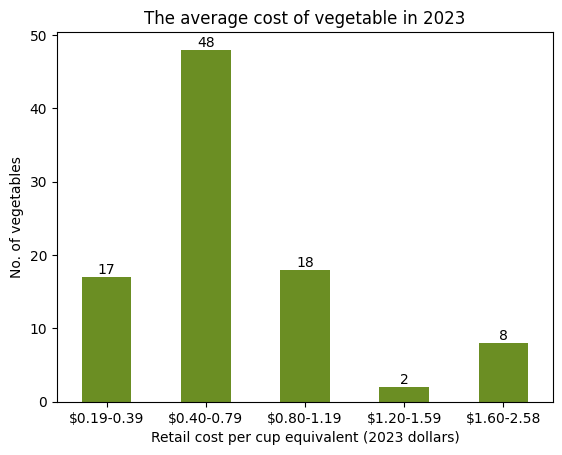

In [126]:
# Visualization
ax = group_vegetables.plot.bar(color="olivedrab",legend=False,title="The average cost of vegetable in 2023",grid=False)

# Customize the plot
ax.set_xlabel("Retail cost per cup equivalent (2023 dollars)")
ax.set_ylabel("No. of vegetables")
ax.set_xticklabels(['$0.19-0.39','$0.40-0.79','$0.80-1.19','$1.20-1.59','$1.60-2.58'],rotation=0)
ax.set_yticks([0,10,20,30,40,50])
ax.bar_label(ax.containers[0])

#### Takeaway
Based on the guidelines, 2.5-cup-vegetable daily recommendation can be obtained at as little cost as $0.40-0.80 with 17 options or $0.80-1.60 with an extra 48 options.

#### Get to know the right types of vegetables

In [127]:
# Find the most expensive vegetables
df_vegetables.sort_values(by=['CupEquivalentPrice'], ascending=False).head(8)

,Vegetable,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
5,Asparagus,Frozen,6.70,per pound,1.03,0.40,pounds,2.57
1,Artichoke,Fresh,2.19,per pound,0.38,0.39,pounds,2.25
3,Asparagus,Fresh,2.76,per pound,0.49,0.40,pounds,2.22
2,Artichoke,Canned,3.41,per pound,0.65,0.39,pounds,2.03
4,Asparagus,Canned,3.13,per pound,0.65,0.40,pounds,1.91
68,Okra,Fresh,3.98,per pound,0.77,0.35,pounds,1.82
70,Olives,Canned,5.77,per pound,1.00,0.30,pounds,1.72
85,"Tomatoes, grape & cherry",Fresh,4.15,per pound,0.91,0.37,pounds,1.71


Asparagus and artichoke, either fresh or canned, are amongst the most expensive vegetables.

In [128]:
df_vegetables.sort_values(by=['CupEquivalentPrice'], ascending=False).tail(5)

,Vegetable,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
52,"Lettuce, iceberg",Fresh,1.00,per pound,0.95,0.24,pounds,0.25
67,Navy beans,Dried,1.49,per pound,2.47,0.39,pounds,0.23
74,Potatoes,Fresh,0.67,per pound,0.81,0.26,pounds,0.22
9,Black beans,Dried,1.38,per pound,2.47,0.39,pounds,0.21
73,Pinto beans,Dried,1.29,per pound,2.47,0.39,pounds,0.20


On the other hand, dried legumes like navy, black or pinto beans are the most affordable, ranged from 20-23 cents per cup equivalent. Fresh potatoes and iceberg lettuce also fall in the top 5 cheapest vegetables, at repectively 22 cents and 25 cents per cup equivalent.

### Summary
Indicated by the above analysis using 2023 price data, it was still possible for Americans to eat a wide variety of fruits and vegetables that would satisfy USDA *Dietary Guidelines'* recommendations for a person on a 2,000-calorie-per-day diet.

## References

**Data was last updated on 5-23-2024:** 

+ Fruit and Vegetable Prices by Hayden Stewart and Jeffrey Hyman (2024). Economic Research Service, U.S. Department of Agriculture. <https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/#Archived%20Data%20Tables%20for%20Snack%20Substitutions>

**See official reports:**

-   The Cost of Satisfying Fruit and Vegetable Recommendations in the Dietary Guidelines by Hayden Stewart, Jeffrey Hyman, Andrea Carlson, and Elizabeth Frazão (2016). Economic Research Service, U.S. Department of Agriculture. <https://www.ers.usda.gov/publications/pub-details/?pubid=42904>.

-   Americans Still Can Meet Fruit and Vegetable Dietary Guidelines for $2.10-$2.60 per Day by Hayden Stewart and Jeffrey Hyman (2019). Economic Research Service, U.S. Department of Agriculture. <https://www.ers.usda.gov/amber-waves/2019/june/americans-still-can-meet-fruit-and-vegetable-dietary-guidelines-for-2-10-2-60-per-day/>

